<a href="https://colab.research.google.com/github/Phanttan/Deep-learning-with-Python-Francois-Chollet/blob/main/3_5_classifying_newswires_relu2tanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

'2.4.3'

## The Reuters dataset


We will be working with the _Reuters dataset_, a set of short newswires and their topics, published by Reuters in 1986. It's a very simple, 
widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each 
topic has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. Let's take a look right away:

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


## Preparing the data

We can vectorize the data with the exact same code as in our previous example:

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

## Building our network


This topic classification problem looks very similar to our previous movie review classification problem: in both cases, we are trying to 
classify short snippets of text. There is however a new constraint here: the number of output classes has gone from 2 to 46, i.e. the 
dimensionality of the output space is much larger. 

In a stack of `Dense` layers like what we were using, each layer can only access information present in the output of the previous layer. 
If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each 
layer can potentially become an "information bottleneck". In our previous example, we were using 16-dimensional intermediate layers, but a 
16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, 
permanently dropping relevant information.

For this reason we will use larger layers. Let's go with 64 units:

In [3]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Validating our approach

Let's set apart 1,000 samples in our training data to use as a validation set:

In [4]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [5]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Now let's train our network for 20 epochs:

In [6]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 81ms/step - loss: 1.8785 - accuracy: 0.5774 - val_loss: 1.2123 - val_accuracy: 0.7450
Epoch 2/20
16/16 [==============================] - 1s 70ms/step - loss: 0.9172 - accuracy: 0.8099 - val_loss: 0.9870 - val_accuracy: 0.7860
Epoch 3/20
16/16 [==============================] - 1s 69ms/step - loss: 0.5947 - accuracy: 0.8841 - val_loss: 0.8645 - val_accuracy: 0.8080
Epoch 4/20
16/16 [==============================] - 1s 69ms/step - loss: 0.3919 - accuracy: 0.9240 - val_loss: 0.8490 - val_accuracy: 0.8000
Epoch 5/20
16/16 [==============================] - 1s 69ms/step - loss: 0.2767 - accuracy: 0.9430 - val_loss: 0.8231 - val_accuracy: 0.8270
Epoch 6/20
16/16 [==============================] - 1s 70ms/step - loss: 0.2066 - accuracy: 0.9490 - val_loss: 0.8526 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 70ms/step - loss: 0.1670 - accuracy: 0.9505 - val_loss: 0.8939 - val_accuracy: 0.8020
Epoch 8/20
16

Let's display its loss and accuracy curves:

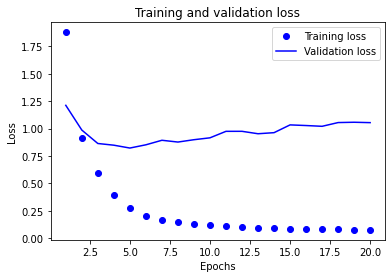

In [7]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

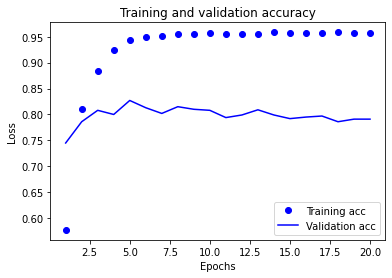

In [9]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

It seems that the network starts overfitting after 5 epochs. Let's train a new network from scratch for 5 epochs, then let's evaluate it on 
the test set:

In [11]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=5,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/5
16/16 [==============================] - 1s 76ms/step - loss: 1.8791 - accuracy: 0.5981 - val_loss: 1.2463 - val_accuracy: 0.7050
Epoch 2/5
16/16 [==============================] - 1s 68ms/step - loss: 0.9090 - accuracy: 0.8031 - val_loss: 0.9556 - val_accuracy: 0.8000
Epoch 3/5
16/16 [==============================] - 1s 68ms/step - loss: 0.5956 - accuracy: 0.8832 - val_loss: 0.8644 - val_accuracy: 0.8200
Epoch 4/5
16/16 [==============================] - 1s 68ms/step - loss: 0.3907 - accuracy: 0.9232 - val_loss: 0.8325 - val_accuracy: 0.8180
Epoch 5/5
71/71 [==============================] - 0s 3ms/step - loss: 0.9194 - accuracy: 0.7912


In [ ]:
results

[0.9852544665336609, 0.784060537815094]

## Generating predictions on new data

We can verify that the `predict` method of our model instance returns a probability distribution over all 46 topics. Let's generate topic 
predictions for all of the test data:

In [ ]:
predictions = model.predict(x_test)

Each entry in `predictions` is a vector of length 46:

In [ ]:
predictions[0]

array([4.1584605e-07, 3.5419564e-06, 1.9429137e-06, 9.9919873e-01,
       5.5723917e-04, 3.4790830e-07, 1.6423097e-06, 2.6677674e-07,
       4.2820317e-05, 5.2972709e-08, 2.4371245e-06, 3.4276647e-05,
       1.2422308e-06, 1.2657516e-05, 4.9231670e-07, 1.2329826e-07,
       9.2478513e-06, 1.6267002e-06, 1.4815582e-06, 1.3647511e-05,
       3.1361702e-05, 6.0507468e-06, 6.9931082e-07, 1.6375520e-06,
       3.9686724e-06, 1.1339266e-07, 3.8883572e-06, 2.9497687e-07,
       6.1166611e-06, 4.4556223e-06, 2.6348396e-05, 5.1414276e-07,
       5.5296198e-07, 1.6376162e-06, 3.8069342e-07, 3.3730848e-07,
       1.8397443e-05, 1.1717285e-06, 5.8334813e-06, 5.7901639e-07,
       2.7720850e-07, 7.2587807e-07, 6.0268235e-08, 3.3386297e-07,
       9.7336201e-09, 1.8131944e-08], dtype=float32)

## Wrapping up


Here's what you should take away from this example:

* If you are trying to classify data points between N classes, your network should end with a `Dense` layer of size N.
* In a single-label, multi-class classification problem, your network should end with a `softmax` activation, so that it will output a 
probability distribution over the N output classes.
* _Categorical crossentropy_ is almost always the loss function you should use for such problems. It minimizes the distance between the 
probability distributions output by the network, and the true distribution of the targets.
* There are two ways to handle labels in multi-class classification:
    ** Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using `categorical_crossentropy` as your loss 
function.
    ** Encoding the labels as integers and using the `sparse_categorical_crossentropy` loss function.
* If you need to classify data into a large number of categories, then you should avoid creating information bottlenecks in your network by having 
intermediate layers that are too small.